<a href="https://colab.research.google.com/github/jfdoppler/DNL_2020/blob/master/01c_python_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Paquetes
Una de las fortalezas de Python es que hay mucha gente muy comprometida en hacer código compartible. El código se comparte en forma de paquetes (o librerías). Algunos famosos son numpy (numérico), scipy (científico?), matplotlib (gráficos), pandas (manejo de datos)

Para poder usar los paquetes hay que importarlos. Hay distintas formas de importar:

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Otra forma de importar es

```
from scipy.integrate import *
```
De esta forma se integra todo lo que está contenido en el paquete, con su nombre. Esta forma no es tan recomendada ya que perdemos un poco el control de qué funciones tenemos. También puede haber paquetes que tengan funciones definidas con el mismo nombre y que no hagan exactamente lo mismo


Para usar una función de alguno de estos paquetes se usa la sintaxis:


```
paquete.funcion(argumentos)
```

Por ejemplo, para calcular el valor medio de una lista:
```
np.mean([1, 2, 3])
```



Algunos que van a venir bien de numpy son para crear arrays (listas) y matrices (listas de listas)

In [3]:
x = np.linspace(0, 1, 10)
print(x)
x2 = np.arange(0, 1, 0.02)
print(x2)
x3 = np.zeros(5)
print(x3)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98]
[0. 0. 0. 0. 0.]


Una cosa buena de numpy es que está opera sobre los arrays como uno esperaría:

In [0]:
x = np.arange(0, 1, 0.1)
print(x)
print(x**2)
print(2*x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.   0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81]
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]


## Ejercicios

1) Escribí una función que busque el mínimo de:

$$
y = 2x^2+\sin x
$$

Pista: arrancá definiendo un array $x$ y calculá la función en cada punto

2) Ahora aproximá los puntos donde la función cruza el eje.

Pista: es muy difícil (en general) encontrar que la función valga exactamente 0 (o cualquier otro valor), pero podemos aproximar un 0 viendo cuando cambia de signo.

## Autovalores y autovectores
Algo que vamos a tener que hacer en la materia es encontrar autovalores y autovectores de matrices. Recordemos el vector $v$ y el escalar $\lambda$ se llamaban autovector y autovalor de la matriz $A$, respectivamente, si se cumplía:

$$
Av=\lambda v
$$

Esto se puede resolver a manopla (lo vamos a repasar en la materia). Numpy cuenta con una serie de funciones de álgebra lineal que nos van a servir. En particular vamos a usar las funciones de [np.linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)

In [0]:
A = np.matrix([[1, 2], [3, 0]])
eigval, eigvec = np.linalg.eig(A)
print(eigval)
print(eigvec)
print(A*eigvec[:, 0])

[ 3. -2.]
[[ 0.70710678 -0.5547002 ]
 [ 0.70710678  0.83205029]]
[[2.12132034]
 [2.12132034]]


Para entender qué nos devuelve la función recordemos que una matriz con autovalores $\lambda_{1,2}$ y autovectores $v_{1,2}$ podía reescribirse mediante un cambio de base:

$$
A = C^{-1}JC
$$
Donde $J$ es una matriz diagonal:
$$
J=\begin{pmatrix}
    \lambda_1 & 0 \\
    0 & \lambda_2
  \end{pmatrix}
$$

y la matriz cambio de base $C^{-1}$ cuyas columnas eran los autovectores asociados. Lo que nos devuelve python es justamente esta matriz ([ver documentación](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig)). Para recuperar los autovectores tenemos que quedarnos con sus columnas, lo que se puede hacer:


```
v1 = eigvec[:, 0]
v2 = eigvec[:, 1]
```




In [0]:
v1 = eigvec[:, 0]
v2 = eigvec[:, 1]
print(v1)
print(A*v1)
print(eigval[0]*v1)

[[0.70710678]
 [0.70710678]]
[[2.12132034]
 [2.12132034]]
[[2.12132034]
 [2.12132034]]


## Gráficos con matplotlib
Vamos a ver algunas funcionalidades básicas que nos van a ser útiles. La más común es [plt.plot](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html) que nos permite hacer gráficos sencillos y aggiornarlos tanto como queramos.

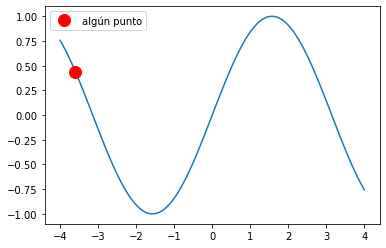

In [6]:
x = np.linspace(-4, 4, 100)
y = np.sin(x)
plt.plot(x, y)
plt.plot(x[5], y[5], 'o', ms=12, c='r', label='algún punto')
plt.legend()

## Ejercicio
1) Haga un gráfico de la función:

$$
y=e^x-\cos{x}
$$

Marque los ceros de la misma con puntos (use la función que escribió antes!)

2) Haga un gráfico donde se grafiquen los autovectores de la matriz:
$$
A=\begin{pmatrix}
    1 & -1 \\
    2 & -3
  \end{pmatrix}
$$


Durante la materia, verán que muchas veces nos va a interesar encontrar puntos, o curvas donde ciertas funciones tomen ciertos valores (¿se puede decir de forma más vaga?).

En 1D ya vimos que esto, aunque ineficiente, se puede hacer si uno arma una lista de puntos y se fija si en algún momento la función está por encima y luego por debajo del valor deseado. Y ahí tenemos una aproximación del punto buscado.

Una forma más rápida de hacer esto en 2D es buscando curvas de nivel. Python trae incorporadas diversas rutinas, una que vamos a ver es [plt.contour](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.contour.html) que nos va a permitir graficar estas curvas de nivel en el plano.

Para hacer esto, tenemos que darle a la función una grilla de puntos del plano y el valor de la función en esos puntos. Una forma de armar esta grilla es usando la función [np.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html):

In [7]:
x = [-2, -1, 0]
y = [1, 2, 3]
XX, YY = np.meshgrid(x, y)
print(XX)
print(YY)
    

[[-2 -1  0]
 [-2 -1  0]
 [-2 -1  0]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


Noten que si ahora vamos recorriendo ambas variables en orden, tenemos todas las combinaciones de los $x$ e $y$.

Otra de las gracias de esta función es que podemos mandarla derecho a una fórmula para calcular la función. Como son arrays de numpy, las operaciones que escribimos se hacen elemento a elemento:

In [9]:
print(XX+YY)


[[-1  0  1]
 [ 0  1  2]
 [ 1  2  3]]


Definamos una función a la cual le vamos a calcular curvas de nivel:
$$
f(x, y)=x^2+\sin{x}\sin{y}
$$

y una grilla de puntos

In [0]:
def funcion(x, y):
    return x**2+np.sin(y)*np.sin(x)

x = np.linspace(-2, 2, 100)
y = np.linspace(-5, 5, 100)
XX, YY = np.meshgrid(x, y)

<a list of 8 text.Text objects>

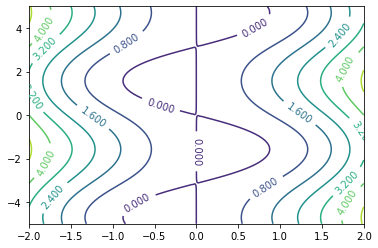

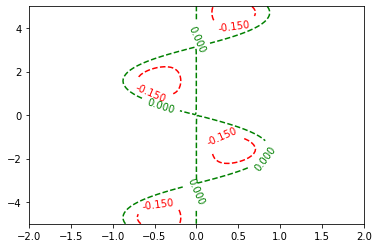

In [49]:
f_xy = funcion(XX, YY)
c = plt.contour(XX, YY, f_xy)
plt.clabel(c, c.levels)

plt.figure()
c = plt.contour(XX, YY, f_xy, levels=[-0.15, 0], colors=['r', 'g'], linestyles='dashed')
plt.clabel(c, c.levels)
